## Supervised Learning. Linear Regression

### Sklearn linear models

https://scikit-learn.org/stable/modules/linear_model.html

In [120]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

In [121]:
cd '/Users/mk/Documents/ml/data'

/Users/mk/Documents/ml/data


Let's load Iowa house prices dataset. Our aim is to build a Linear Regression model that provides the best fit to relation between price of a house and house characteristics.

In [154]:
dat = pd.read_csv("./house_prices/train.csv")

In [123]:
dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [124]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Quick look at the info for our dataset provides us with the following:

- there are 1460 observations and 79 (81 minus house id and house price) attributes in the train dataset;
- some attributes contain missing values.

#### Missing Values

Missing values may appear in a dataset for a number of reasons:

- refusal to answer a question (survey);
- interconnected question (e.g., 1. Have you visited a doctor? (Yes, No) 1.1. How much did you pay for the visit? (missing if the answer for 1 is No));
- limited period of coverage (panel data, time series data);
- human factor (typos, zeros);
- data damage;
- many more.

We need to handle missing values since ML algorithms (their implementation by Python libraries) do not support them and will raise an error.

#### Missing Values. Detection

First we need to detect missing values and understand how many there are missing values.


In original datasets missing data can be indicated as *n/a,-,null, NaN, ., NA, 99999999* values.


Missing values in Python are marked as **NaN** (not a number) for float dtypes and $<NA>$ for other data types. 
NaN is a native Python marker for missing values. It is preferable to use to perform fast computations. 

Whereas NA is introduced experimentally in pandas (version > 1.0.0) to handle missing data for nullable integer, boolean and dedicated string data types. Currently, pandas does not yet use those data types by default (when creating a DataFrame or Series, or when reading in data), so you need to specify the dtype explicitly. An easy way to convert to those dtypes is explained <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data-na-conversion">here</a>.

In [125]:
#introduction of NaN value affects the dtype of the array
vals = np.array([1, np.nan, 3, 4]) 
vals,vals.dtype

(array([ 1., nan,  3.,  4.]), dtype('float64'))

In [126]:
#use NaN corresponding functions to handle missing values
np.sum(vals),np.nansum(vals)

(nan, 8.0)

None is a missing data marker in Python for Python object data type. Pandas handle both NaN and None and it makes conversion where needed.

In [127]:
#numpy best guess for array's dtype
np.array([1, None, 3, 4])

array([1, None, 3, 4], dtype=object)

In [128]:
#pandas None conversion to NaN
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [129]:
#detect nulls as a boolean mask
dat.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [130]:
#list columns containing missing values
[col for col in dat.columns if dat[col].isnull().any()]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [131]:
#store number of missing values per column as Series object
m_val = dat.isnull().sum()

In [132]:
m_val[m_val>0].sort_values(ascending=False) #filter out and sort columns with missing values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [133]:
m_val[m_val>0].sort_values(ascending=False) / len(dat) * 100 #the same in percentages

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [134]:
dat[dat['Fence'].notnull()].describe().iloc[:,:10] #descriptive stats for first 10 features with Fence non-missing

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1
count,281.000000,281.000000,228.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,724.740214,47.900356,71.741228,9565.103203,5.562278,5.964413,1957.181495,1977.932384,65.359431,430.754448
std,438.140258,33.790912,19.585319,3172.118328,1.037098,1.264409,24.055868,18.550290,126.956189,360.745409
min,6.000000,20.000000,21.000000,1300.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000
25%,308.000000,20.000000,60.000000,7804.000000,5.000000,5.000000,1945.000000,1964.000000,0.000000,0.000000
50%,742.000000,50.000000,70.000000,9100.000000,5.000000,6.000000,1963.000000,1977.000000,0.000000,438.000000
75%,1120.000000,60.000000,80.000000,10594.000000,6.000000,7.000000,1974.000000,1995.000000,90.000000,663.000000
max,1458.000000,190.000000,174.000000,25419.000000,10.000000,9.000000,2004.000000,2009.000000,1047.000000,2096.000000


In [135]:
dat[dat['Fence'].isnull()].describe().iloc[:,:10] #descriptive stats for first 10 features with Fence missing

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1
count,1179.000000,1179.000000,973.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1171.000000,1179.000000
mean,731.872774,59.041561,69.653649,10743.659881,6.227311,5.482612,1974.625106,1986.518236,112.882152,446.710772
std,417.753586,43.827558,25.252231,10987.768403,1.424107,1.053087,30.555751,20.782534,190.694165,476.094891
min,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000
25%,373.500000,20.000000,58.000000,7417.500000,5.000000,5.000000,1955.000000,1969.000000,0.000000,0.000000
50%,728.000000,60.000000,68.000000,9550.000000,6.000000,5.000000,1978.000000,1996.000000,0.000000,370.000000
75%,1091.500000,70.000000,80.000000,11840.000000,7.000000,6.000000,2003.000000,2005.000000,178.000000,728.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000


In [23]:
#making a list of missing value types (not run)
missing_values = ["99999999", "n.a.", "n/a"]
dat = pd.read_csv("./data/train.csv", na_values = missing_values)

FileNotFoundError: [Errno 2] File train.csv does not exist: 'train.csv'

In [136]:
#example with experimental <NA> for datatypes other than float
df = pd.DataFrame([[1,pd.NA,2],
                   [2,3,5],
                   [pd.NA,4,6]])
df

,0,1,2
0,1,<NA>,2
1,2,3,5
2,<NA>,4,6


#### Missing Values. Handling

Handling of missing data vary depending on potential source of missing values as well as the number of missing values.

In our example share of missing values per column varies from 0.06% to 99.5% percent. The source of missing values can differ. We may suspect that fence, fireplace or pool are missing, simply because houses don't have such attributes. The same conclusion holds for the Garage related attributes, they all have similar share of missing values.

Whereas basement condition and basement quality can be non-reported or damaged.

The simple solution is to drop missing values.

In [137]:
dat1 = dat.dropna().copy() #drop rows which contain missing values (any)

In [138]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             0 non-null      int64  
 1   MSSubClass     0 non-null      int64  
 2   MSZoning       0 non-null      object 
 3   LotFrontage    0 non-null      float64
 4   LotArea        0 non-null      int64  
 5   Street         0 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       0 non-null      object 
 8   LandContour    0 non-null      object 
 9   Utilities      0 non-null      object 
 10  LotConfig      0 non-null      object 
 11  LandSlope      0 non-null      object 
 12  Neighborhood   0 non-null      object 
 13  Condition1     0 non-null      object 
 14  Condition2     0 non-null      object 
 15  BldgType       0 non-null      object 
 16  HouseStyle     0 non-null      object 
 17  OverallQual    0 non-null      int64  
 18  OverallCond    0 non-n

In [139]:
dat1 = dat.dropna(axis=1).copy() #drop columns which contain missing values (any)

In [140]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [141]:
dat1 = dat.dropna(axis=1,how='all').copy() #drop columns which contain missing values (all)

In [142]:
dat1.info() #there are no fully NaN columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

If the majority of values in a column are missing then removing such column is the best solution. 

In [155]:
dat = dat.dropna(axis=1,thresh=1000) #require that many non-NA values

In [156]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [157]:
dat.isnull().sum()[dat.isnull().sum()>0].sort_values(ascending=False) / len(dat) * 100

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Dropping the column entirely leads to information loss. Alternative option for missing data handling is **imputation** - filling missing values with some number. Control over imputed values allows us not to loose additional information that can be used to improve our model performance.

By default missing values are imputed by mean value for a column. There are other possible ways to impute missing values, but mean value approach is the most common and provides good approximation.

Categorical features can be imputed with 'the most frequent' strategy.

In [158]:
mis_col = [col for col in dat.columns if dat[col].isnull().any()]
dat[mis_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [159]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer() #initiate the imputer with default parameters: missing_values='NaN', strategy='mean'
dat[['LotFrontage','MasVnrArea']] = imp.fit_transform(dat[['LotFrontage','MasVnrArea']]) #apply imputation for float type

In [160]:
mis_col = [col for col in dat.columns if dat[col].isnull().any()]
dat[mis_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1452 non-null   object 
 1   BsmtQual      1423 non-null   object 
 2   BsmtCond      1423 non-null   object 
 3   BsmtExposure  1422 non-null   object 
 4   BsmtFinType1  1423 non-null   object 
 5   BsmtFinType2  1422 non-null   object 
 6   Electrical    1459 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  GarageCond    1379 non-null   object 
dtypes: float64(1), object(11)
memory usage: 137.0+ KB


In [161]:
dat['GarageCond'].value_counts() #check distribution of values for one feature 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [163]:
imp = SimpleImputer(strategy='most_frequent') #initiate the imputer with most frequent values
dat[mis_col] = imp.fit_transform(dat[mis_col]) #apply imputation for object data type and GarageYrBlt

In [164]:
dat['GarageCond'].value_counts() #recheck distribution of values for one feature after imputation

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [165]:
[col for col in dat.columns if dat[col].isnull().any()] #there are no columns with NaN left

[]

Our outcome variable is SalePrice. Let's plot SalePrice distribution.

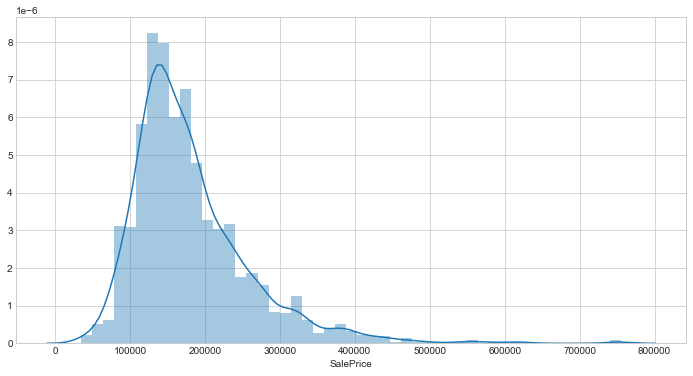

In [166]:
sns.distplot(dat['SalePrice'])

SalePrice distribution is skewed to the right. It may cause problems for model fitting since relative errors for low price and high price houses are treated unevenly. Taking the log helps to overcome this problem.  

In [167]:
#transform predicted variable to be Gaussian
dat['lnSalePrice'] = np.log(dat['SalePrice'])

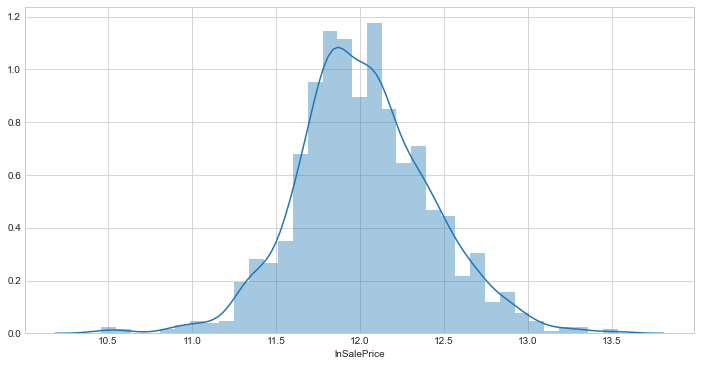

In [168]:
sns.distplot(dat['lnSalePrice'])

We can plot correlation heatmap to see which features have the greatest impact on SalePrice to get rid of those which are unrelated to the outcome variable.

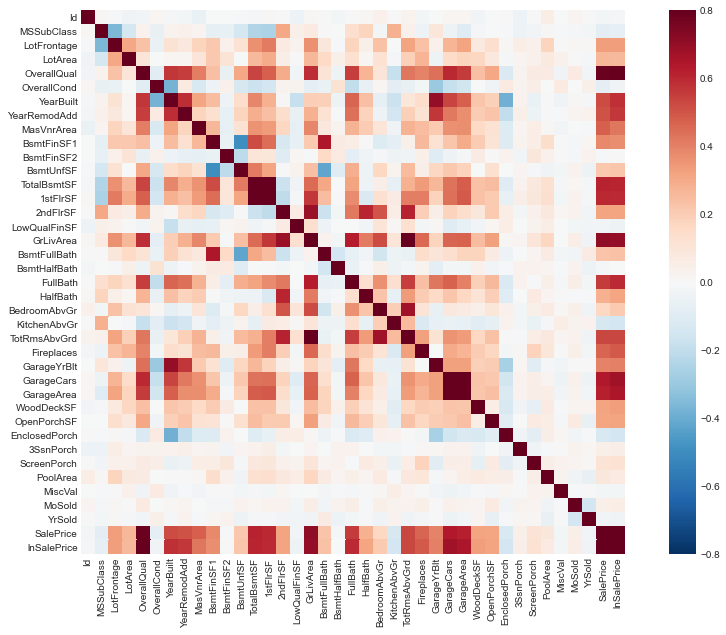

In [169]:
#correlation matrix
corrmat = dat.corr()
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')

Among mostly correlated features with SalePrice there are: Overall Quality, Year Built, Remodel Year, Total Basement Area, 1st Floor Area, Great Living Area, Full Bathrooms above grade,  Total rooms above grade (does not include bathrooms), FirePlaces, Garage Year, Garage Cars, Garage Area, Type 1 finished square feet.

We also know that some of these features show high bivariate correlation, e.g., Garage Cars and Garage Area, Type 1 finished square feet and Unfinished square feet of basement,  Total Basement Area and 1st Floor Area. Simultaneous inclusion of these features into the model doesn't improve the model. The same applies to near zero correlation. So we can safely exclude them from analysis.

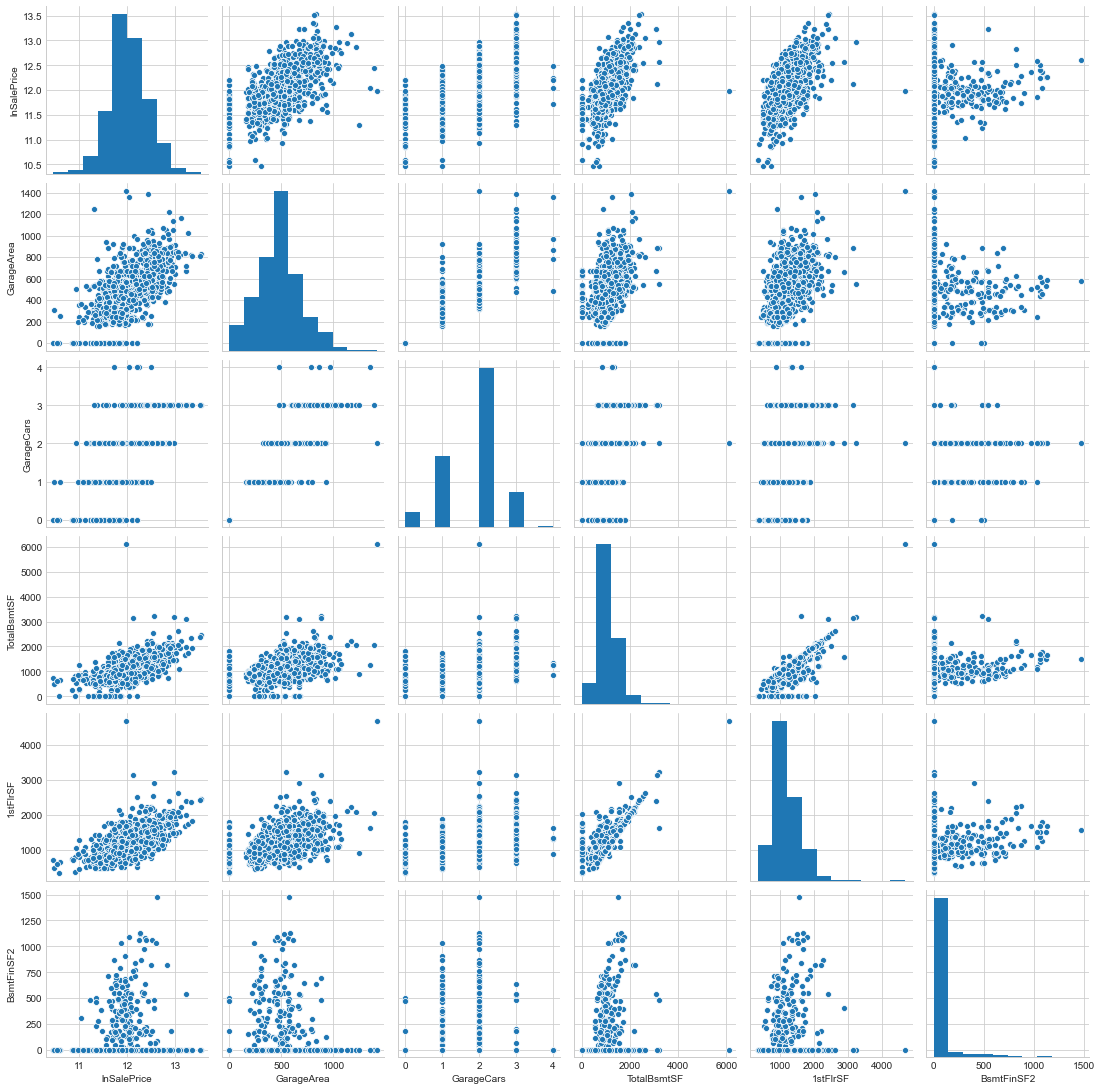

In [173]:
#scatter plots
cols = ['lnSalePrice', 'GarageArea', 'GarageCars', 'TotalBsmtSF','1stFlrSF','BsmtFinSF2']
sns.pairplot(dat[cols], height = 2.5)
plt.show()

In [192]:
corrmat['lnSalePrice'].sort_values(ascending=False)[:15] #check features correlated with lnSalePrice

lnSalePrice     1.000000
SalePrice       0.948374
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
Fireplaces      0.489449
MasVnrArea      0.429531
GarageYrBlt     0.406004
Name: lnSalePrice, dtype: float64

In [189]:
corrval = corrmat.unstack()
corrval[(abs(corrval) > 0.6) & (abs(corrval) < 1)] #check the correlated features

OverallQual   GarageCars      0.600671
              SalePrice       0.790982
              lnSalePrice     0.817184
YearBuilt     GarageYrBlt     0.700098
BsmtFinSF1    BsmtFullBath    0.649212
TotalBsmtSF   1stFlrSF        0.819530
              SalePrice       0.613581
              lnSalePrice     0.612134
1stFlrSF      TotalBsmtSF     0.819530
              SalePrice       0.605852
2ndFlrSF      GrLivArea       0.687501
              HalfBath        0.609707
              TotRmsAbvGrd    0.616423
GrLivArea     2ndFlrSF        0.687501
              FullBath        0.630012
              TotRmsAbvGrd    0.825489
              SalePrice       0.708624
              lnSalePrice     0.700927
BsmtFullBath  BsmtFinSF1      0.649212
FullBath      GrLivArea       0.630012
HalfBath      2ndFlrSF        0.609707
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  2ndFlrSF        0.616423
              GrLivArea       0.825489
              BedroomAbvGr    0.676620
GarageYrBlt   YearBuilt  

#### Linear Regression. Normal Equations

Now let's build a Linear Regression model and fit it using Normal Equations (OLS).

In [41]:
dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [174]:
#assign numeric codes to string categories 
for col in dat.columns:
    if(dat[col].dtype == 'object'):
        dat[col]= dat[col].astype('category') #transform object data type to categorical
        dat[col] = dat[col].cat.codes #assign numeric codes for each category within column

In [364]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #initiate the model with default parameters
X = dat.loc[:,['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','FullBath','YearBuilt','YearRemodAdd','Fireplaces','MasVnrArea']]
y = dat.loc[:,'lnSalePrice'] 
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
lr.get_params() #get the list of LinearRegression parameters used to fit the model

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [198]:
lr.intercept_ #model intercept

2.039219458103073

In [199]:
lr.coef_ #model coefficients

array([8.83092306e-02, 2.08657598e-04, 2.61072991e-04, 1.04399181e-04,
       1.37389941e-03, 1.95673509e-03, 2.51297697e-03, 7.90466506e-02,
       3.25743986e-06])

In [324]:
pd.Series(lr.coef_, index=X.columns) #better view on coef

OverallQual     0.088309
GrLivArea       0.000209
GarageArea      0.000261
TotalBsmtSF     0.000104
FullBath        0.001374
YearBuilt       0.001957
YearRemodAdd    0.002513
Fireplaces      0.079047
MasVnrArea      0.000003
dtype: float64

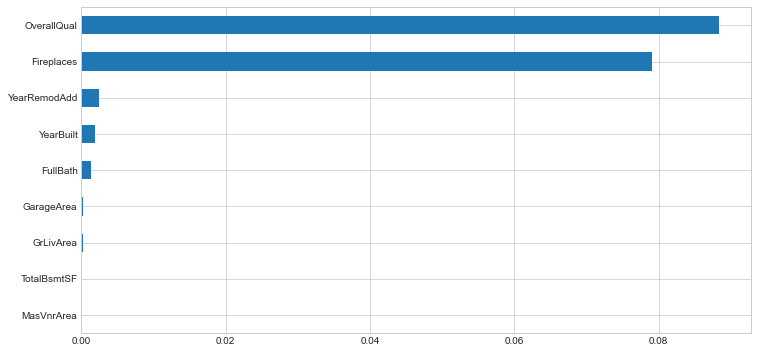

In [326]:
pd.Series(lr.coef_,index=X.columns).sort_values().plot(kind = "barh")

In [200]:
lr.score(X,y) #the coefficient of determination R^2 of the prediction (train set)

0.8278340030897019

To check model performance let's apply **cross-validation**. We use 5-fold cross-validation.

In [201]:
from sklearn.model_selection import cross_val_score
sk = cross_val_score(lr, X, y, cv=5) #default scoring from estimator is used, R^2
print("Mean score (LR): {:.2f}".format(np.mean(sk)))

Mean score (LR): 0.82


Validation score is close to the training score, hence it's unlikely that we are overfitting the model.

We may use alternative model evaluation metric, e.g., Root Mean Squared Error (RMSE) which is the normalized distance between vector of predicted values and vector of observed outcomes (it estimates how spread is the prediction error). Values closer to zero are preferable.

$RMSE = \sqrt{\sum_{i=1}^{n}\frac{(y_i-f(X))^2}{n}}$

In [263]:
from sklearn.metrics import mean_squared_error, make_scorer
sk = cross_val_score(lr, X, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (LR): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (LR): 0.17


#### Linear Regression. Ridge Regression

Let's fit the model with the Ridge regression using regularized least squares estimator.

In [202]:
from sklearn.linear_model import Ridge
r = Ridge(solver='lsqr') #regularized least squares iterative estimator
r.fit(X,y)
r.score(X,y)

0.7746094009862855

In [203]:
r.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)>

LSQR solver shows worse model fit for the training set than OLS.

LSQR uses an iterative method to approximate the solution. The number of iterations required to reach a certain accuracy depends strongly on the scaling of the problem. 

We need to scale features to improve model accuracy.

In [204]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #zero-mean, unit variance normalization
X_scaled = std_scaler.fit_transform(X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [205]:
r.fit(X_scaled,y)
r.score(X_scaled,y)

0.8278338285398894

With rescaling of all the features we achieved better fit for the model on training data.
Let's check model performance using validation sets via **cross-validation**. We use 5-fold cross-validation.

In [264]:
sk = cross_val_score(r, X_scaled, y, cv=5)
print("Mean score (Ridge, lsqr, alpha=1): {:.2f}".format(np.mean(sk)))

Mean score (Ridge, lsqr, alpha=1): 0.82


In [282]:
#rmse for the Ridge regression
sk = cross_val_score(r, X_scaled, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (Ridge, lsqr, alpha=1): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (Ridge, lsqr, alpha=1): 0.17


Model performance is the same for the Ridge regression with lsqr solver as for the OLS regression, which is confirmed by our scoring metrics - R^2 and RMSE. We achieved high accuracy for the training set and for the validation set. There is no reason to think that we have a problem of overfitting.

However, we can explore how model performance changes as we tune the regularization parameter for the Ridge regression. For that purpose we use **validation curves**.

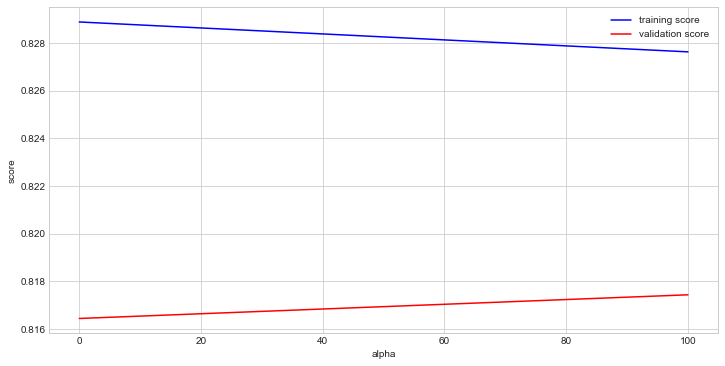

In [275]:
from sklearn.model_selection import validation_curve
alpha_vals = np.logspace(-7, 2, 3) #regularization parameter values range
train_scores, valid_scores = validation_curve(r, X_scaled, y,"alpha",alpha_vals,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(alpha_vals, train_scores_mean, color='blue', label='training score')
plt.plot(alpha_vals, valid_scores_mean, color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('score');

As we increase penalty on coefficients magnitude (alpha >>) coefficients tend to zero, training set performance decreases, whereas validation score slightly increses. We may try to train the model with more restrictive parameter alpha=100. 

In [328]:
r = Ridge(solver='lsqr',alpha=100) #increase penalty on coefficients magnitude
r.fit(X_scaled,y)
sk = cross_val_score(r, X_scaled, y, cv=5)
print("Mean score (Ridge, lsqr, alpha=100): {:.2f}".format(np.mean(sk)))

Mean score (Ridge, lsqr, alpha=100): 0.82


In [329]:
sk = cross_val_score(r, X_scaled, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (Ridge, lsqr, alpha=100): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (Ridge, lsqr, alpha=100): 0.17


By tuning the regularization parameter we didn't achieved an improvement to our model performance (on average) in comparison to the Ridge regression with alpha=1 and lsqr solver, and to Linear Regression with default parameters.

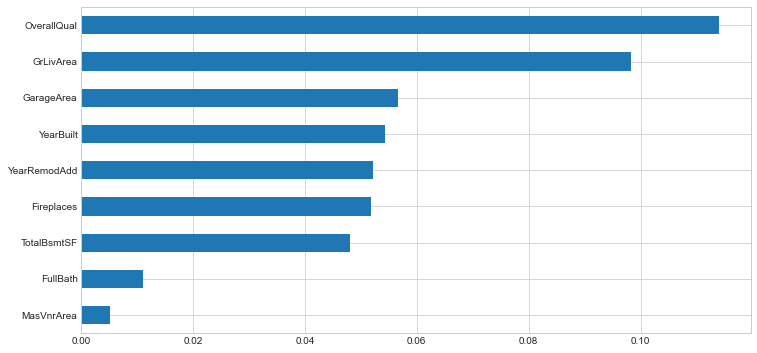

In [330]:
pd.Series(r.coef_,index=X.columns).sort_values().plot(kind = "barh")

#### Polynomials

Further we may explore if adding polynomials of higher degrees to the model increases model performance.

In [279]:
from sklearn.preprocessing import PolynomialFeatures
#if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X) #transform X to higher order polynomials

In [280]:
X.shape,X_poly.shape

((1460, 9), (1460, 55))

In [333]:
lr.fit(X_poly,y)
sk = cross_val_score(lr, X_poly, y, cv=5)
print("Mean score (LR, poly): {:.2f}".format(np.mean(sk)))

Mean score (LR, poly): 0.85


In [341]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x7^2',
 'x7 x8',
 'x8^2']

In [356]:
np.array(X.columns)[:,np.newaxis]

array([['OverallQual'],
       ['GrLivArea'],
       ['GarageArea'],
       ['TotalBsmtSF'],
       ['FullBath'],
       ['YearBuilt'],
       ['YearRemodAdd'],
       ['Fireplaces'],
       ['MasVnrArea']], dtype=object)

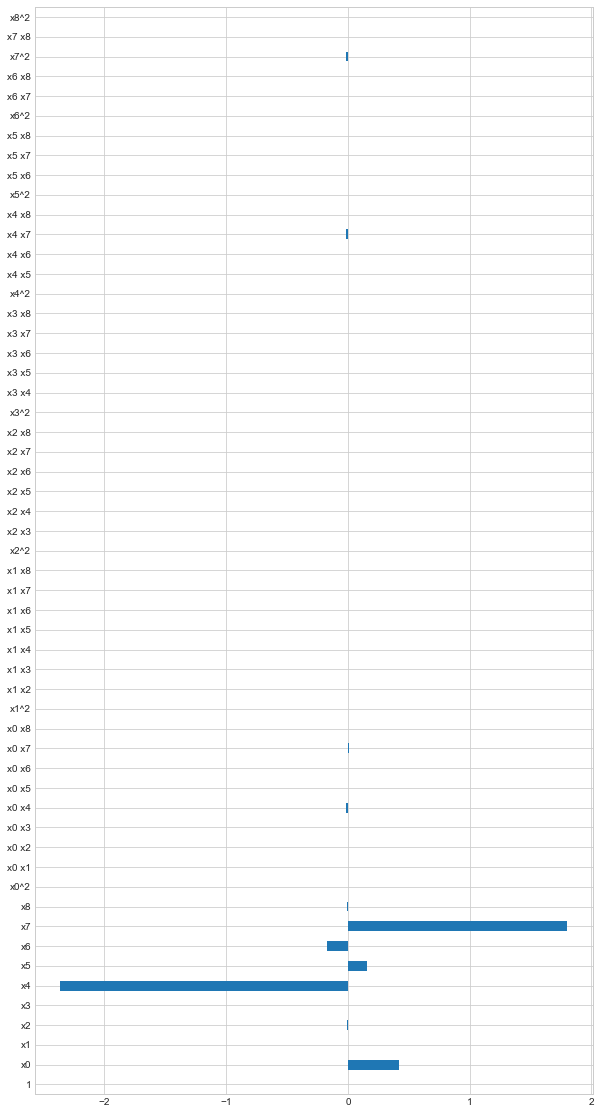

In [353]:
plt.figure(figsize=(10, 20))
pd.Series(lr.coef_,index=poly.get_feature_names()).plot(kind="barh")

In [334]:
sk = cross_val_score(lr, X_poly, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (LR, poly): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (LR, poly): 0.15


In [284]:
#apply standard scaler
X_scaled_poly = std_scaler.fit_transform(X_poly)

In [358]:
r = Ridge(solver='lsqr',alpha=100)
r.fit(X_scaled_poly,y)
r.score(X_scaled_poly,y)

0.8607146363105016

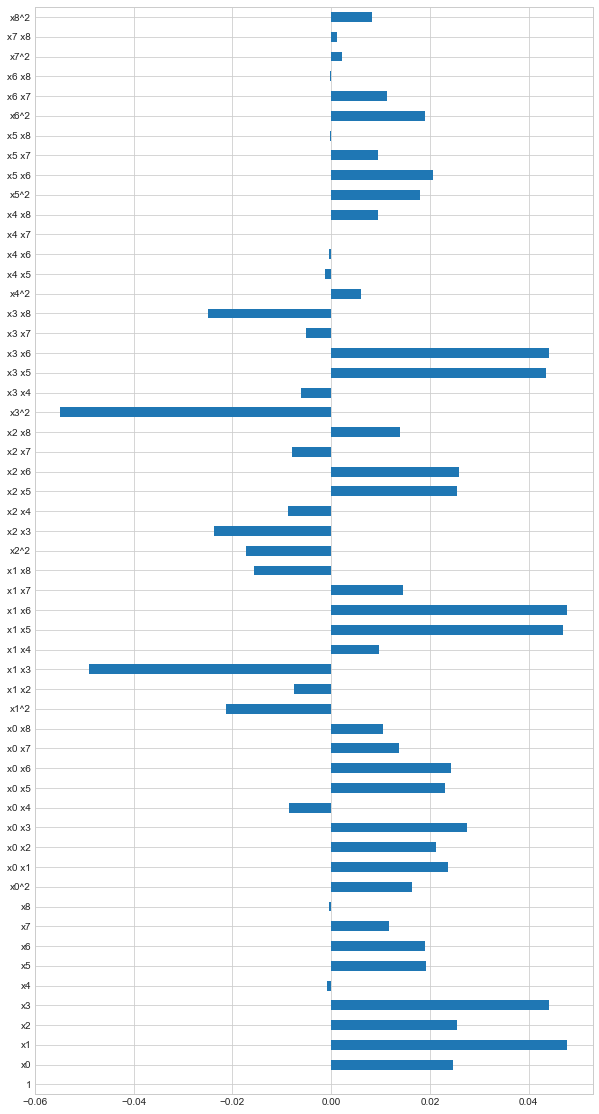

In [359]:
plt.figure(figsize=(10, 20))
pd.Series(r.coef_,index=poly.get_feature_names()).plot(kind="barh")

In [286]:
sk = cross_val_score(r, X_scaled_poly, y, cv=5)
print("Mean score (Ridge, lsqr, alpha=100, poly): {:.2f}".format(np.mean(sk)))

Mean score (Ridge, lsqr, alpha=100, poly): 0.84


In [287]:
sk = cross_val_score(r, X_scaled_poly, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (Ridge, lsqr, alpha=100, poly): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (Ridge, lsqr, alpha=100, poly): 0.16


#### Linear Regression. LASSO regression

We can apply LASSO regression to get rid of features that do not contribute to the explanation of variation in output variable.

In [314]:
from sklearn.linear_model import Lasso
l = Lasso(alpha=0.1)
l.fit(X_scaled_poly,y)
l.score(X_scaled_poly,y)

0.7032930515423618

In [315]:
np.sum(l.coef_==0) #number of features that Lasso got rid of

49

In [363]:
coef = pd.Series(l.coef_,index=poly.get_feature_names())
coef[coef>0]

x0 x1    0.006425
x0 x2    0.056476
x0 x5    0.126676
x1 x5    0.061138
x3 x4    0.007399
x5 x6    0.014609
dtype: float64

LASSO model fit is worse than for the Linear Regression and Ridge regression. It got rid of 49 features out of 55. We can explore how model fit changes with regularization parameter.

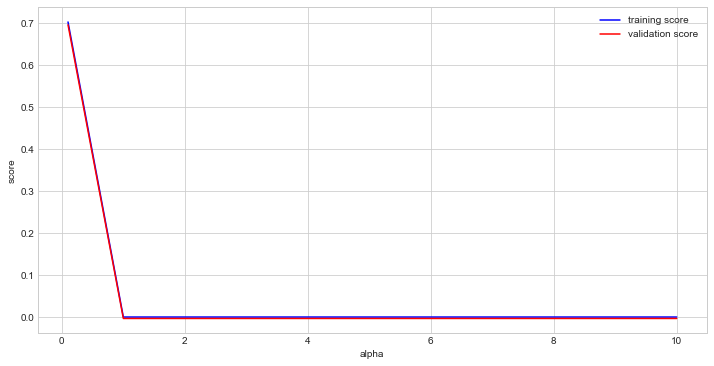

In [316]:
alpha_vals = np.logspace(-1, 1, 3) #regularization parameter values range
train_scores, valid_scores = validation_curve(l, X_scaled_poly, y,"alpha",alpha_vals,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(alpha_vals, train_scores_mean, color='blue', label='training score')
plt.plot(alpha_vals, valid_scores_mean, color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('score');

We see sharp decrease in model goodness of fit as we impose larger penalties on coefficient magnitudes, both for training and validation sets. At alpha close to 1 (default parameter value for LASSO regression) all coefficients become zero.

In [317]:
sk = cross_val_score(l, X_scaled_poly, y, cv=5)
print("Mean score (Lasso, alpha=0.1, poly): {:.2f}".format(np.mean(sk)))

Mean score (Lasso, alpha=0.1, poly): 0.70


In [318]:
sk = cross_val_score(l, X_scaled_poly, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (Lasso, alpha=0.1, poly): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (Lasso, alpha=0.1, poly): 0.22


Models performance comparison on cross-validation sets ($R^2$ mean score; RMSE mean score):

Mean score (LR): 0.82

Mean RMSE score (LR): 0.17

Mean score (Ridge, lsqr, alpha=1): 0.82

Mean RMSE score (Ridge, lsqr, alpha=1): 0.17

Mean score (Ridge, lsqr, alpha=100): 0.82

Mean RMSE score (Ridge, lsqr, alpha=100): 0.17

**Polynomials**

Mean score (LR, poly): 0.85

Mean RMSE score (LR, poly): 0.15

Mean score (Ridge, lsqr, alpha=100, poly): 0.84

Mean RMSE score (Ridge, lsqr, alpha=100, poly): 0.16

Mean score (Lasso, alpha=0.1, poly): 0.70

Mean RMSE score (Lasso, alpha=0.1, poly): 0.22

So far, based on the cross-validation scoring, we may conclude that it is worth to stick to Linear Regression model with polynomials of degree 2. Ridge regression shows results close to Linear Regression, whereas LASSO regression is useless for the model we build.

The model we build is one of many other possible models. We may choose different imputation strategy, increase sample size, choose another set of features, add polynomials of higher order, try alternative algorithms to mention few.